**Importing The Libraries**

In [15]:
import pandas as pd
import numpy as np



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# **Loading the Data**

In [17]:
import pandas as pd
data = pd.read_csv('/content/Social Media.csv')

# **Checking Data Info**

In [18]:
# Display the first few rows of the dataset to understand its structure
data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


In [19]:
data.shape

(103, 10)

In [20]:
# Check Null Values
data.isnull().values.any()

np.False_

In [21]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 0 missing values in data frame


In [22]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 4 duplicated values in data frame


In [23]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Reset index after dropping duplicates
data.reset_index(drop=True, inplace=True)

print(f"Number of rows after removing duplicates: {len(data)}")

Number of rows after removing duplicates: 99


In [24]:
len(data.columns)

10

# **Descriptive Analysis**

In [25]:
data.describe()

,User_ID,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,99.000000,99.000000,99.00000,99.000000,99.000000,99.00000
mean,519.030303,87.929293,2.89899,33.868687,13.878788,20.40404
std,286.771560,34.389798,1.75252,23.313588,8.189432,7.46819
min,16.000000,40.000000,1.00000,5.000000,2.000000,10.00000
25%,275.000000,60.000000,1.00000,15.000000,7.000000,13.50000
50%,526.000000,75.000000,3.00000,28.000000,12.000000,20.00000
75%,774.500000,105.000000,4.00000,42.500000,20.000000,25.00000
max,997.000000,200.000000,8.00000,110.000000,40.000000,45.00000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization

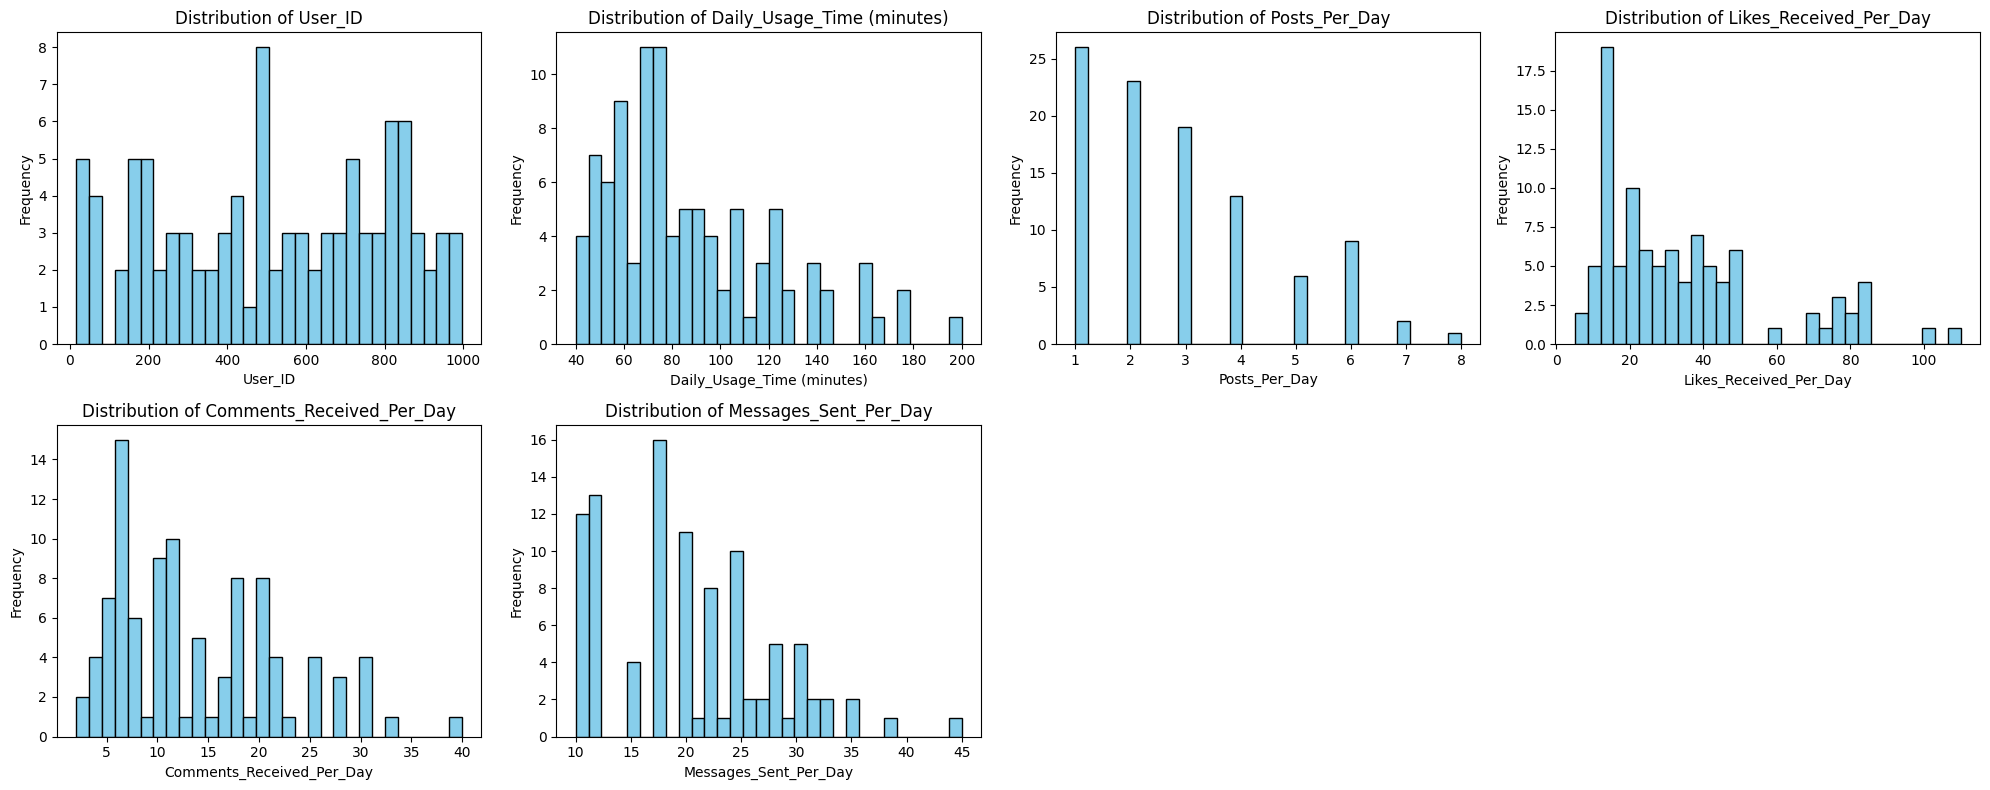

In [27]:
# Identify numerical columns for plotting
numerical_columns = data.select_dtypes(include=np.number).columns

# Create a grid for the plots based on the number of numerical columns
# Assuming a maximum of 4 numerical columns for a 2x2 grid, adjust as needed
num_plots = len(numerical_columns)
if num_plots > 0:
    # Calculate rows and columns for the subplot grid dynamically
    n_cols = min(4, num_plots) # Max 4 columns per row
    n_rows = (num_plots + n_cols - 1) // n_cols # Ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

    # Flatten the axes array to easily iterate over it, even for a single plot
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes]) # Make it iterable if only one subplot
    axes = axes.flatten()

    # Loop through the numerical columns and plot the histograms
    for i, column in enumerate(numerical_columns):
        if i < len(axes): # Ensure we don't go out of bounds if num_plots < len(axes)
            axes[i].hist(data[column], bins=30, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribution of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found to plot.")

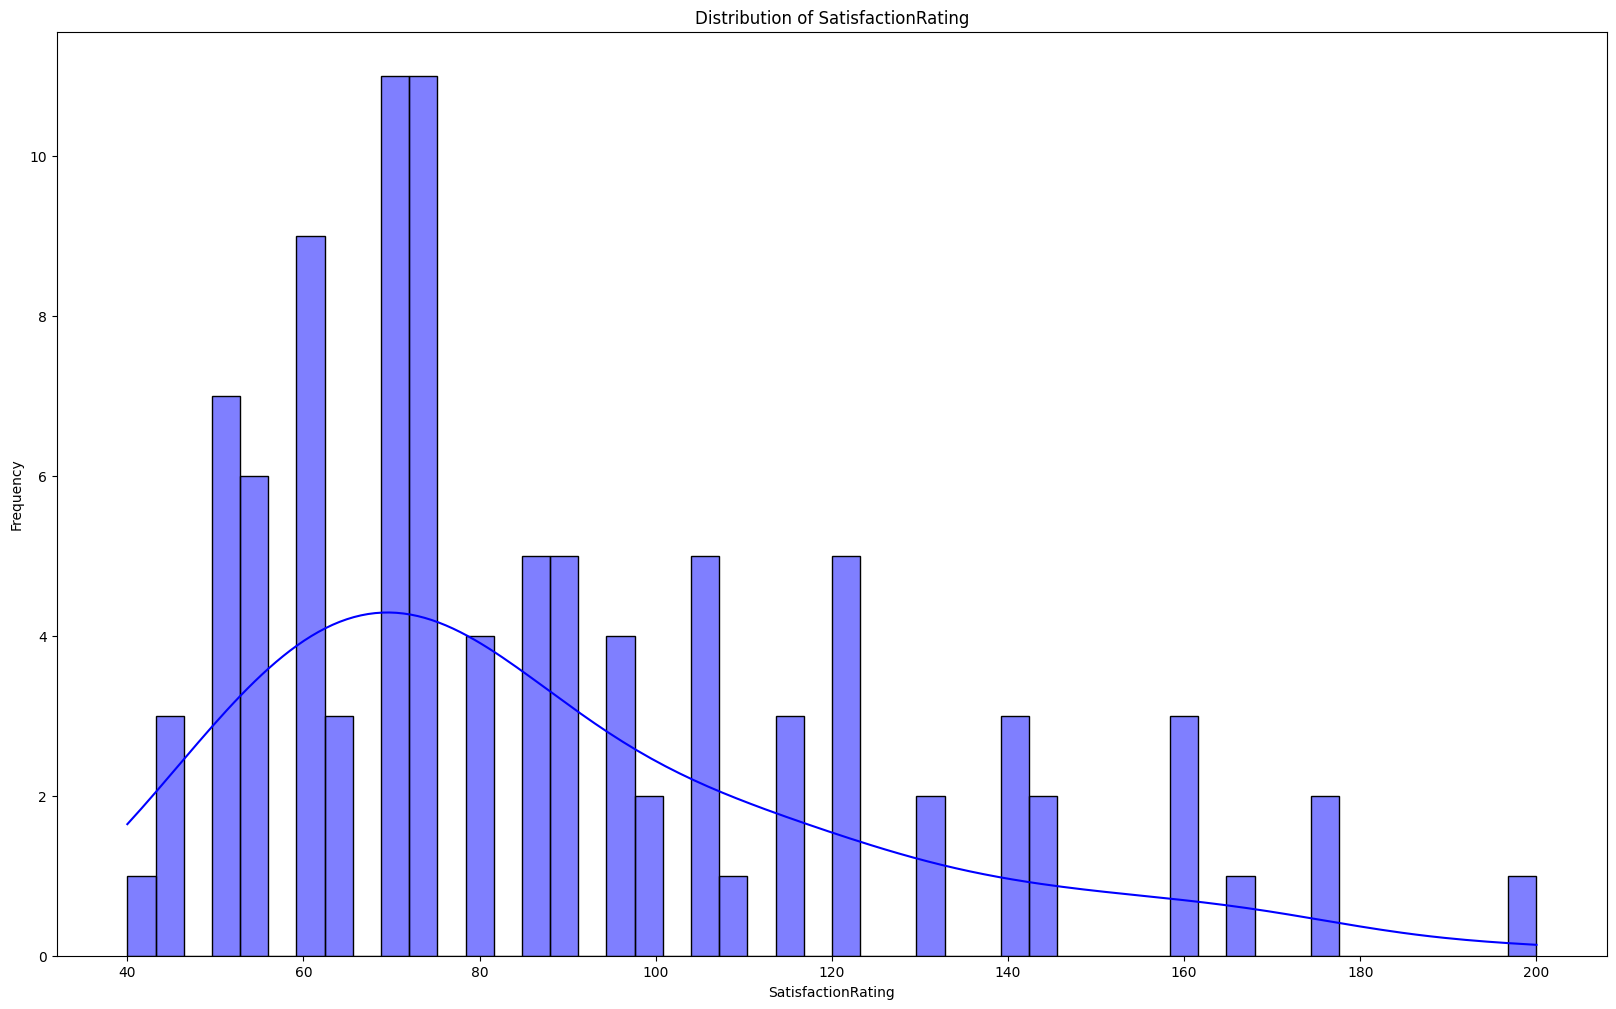

In [28]:
# Check distribution of the target variable
plt.figure(figsize=(20, 12))
sns.histplot(data['Daily_Usage_Time (minutes)'], kde=True, color='blue', bins=50)
plt.title('Distribution of SatisfactionRating')
plt.xlabel('SatisfactionRating')
plt.ylabel('Frequency')
plt.show()

In [29]:
correlation_matrix = data.corr(numeric_only=True)

In [30]:
correlation_matrix

,User_ID,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
User_ID,1.000000,0.138411,0.142376,0.106297,0.202402,0.038778
Daily_Usage_Time (minutes),0.138411,1.000000,0.876904,0.929893,0.892758,0.876577
Posts_Per_Day,0.142376,0.876904,1.000000,0.924489,0.935499,0.864655
Likes_Received_Per_Day,0.106297,0.929893,0.924489,1.000000,0.941839,0.898108
Comments_Received_Per_Day,0.202402,0.892758,0.935499,0.941839,1.000000,0.878230
Messages_Sent_Per_Day,0.038778,0.876577,0.864655,0.898108,0.878230,1.000000


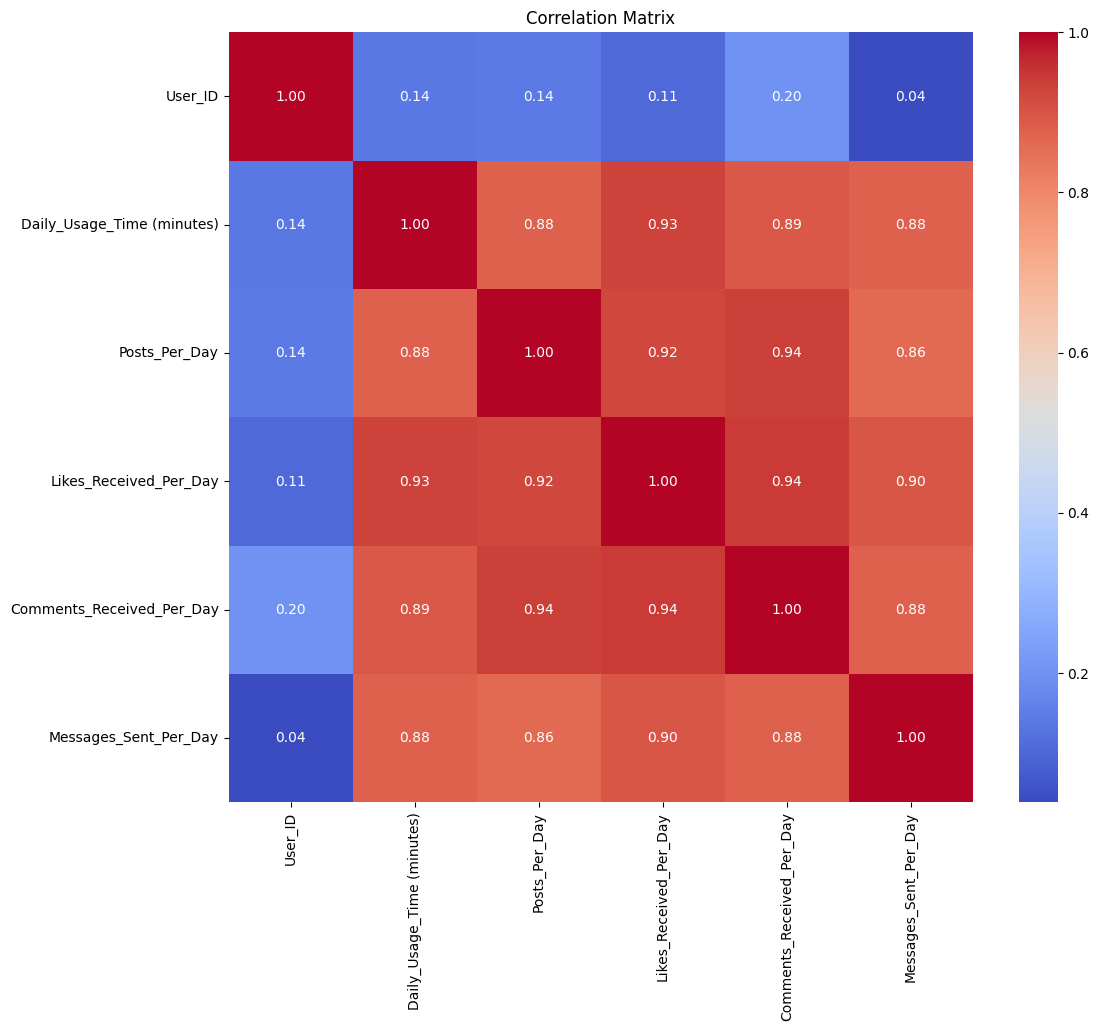

In [31]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Check for missing values
missing_values = data.isnull().sum()

In [33]:
missing_values

,0
User_ID,0
Age,0
Gender,0
Platform,0
Daily_Usage_Time (minutes),0
Posts_Per_Day,0
Likes_Received_Per_Day,0
Comments_Received_Per_Day,0
Messages_Sent_Per_Day,0
Dominant_Emotion,0


In [34]:
# Step 3: Prepare the features (X) and target (y)
X = data.drop(columns=['Daily_Usage_Time (minutes)','User_ID'])
y = data['Daily_Usage_Time (minutes)']

In [35]:
# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Handle potential missing numerical values
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Handle potential missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Convert categorical to numerical
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing to X
X_scaled = preprocessor.fit_transform(X)

In [36]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
# Analysis

# Central tendency
mean = data.mean(numeric_only=True)
median = data.median(numeric_only=True)
mode = data.mode().iloc[0]

# Dispersion
std = data.std(numeric_only=True)
variance = data.var(numeric_only=True)

# Filter for strictly numeric columns (int, float) to avoid boolean subtraction error
numeric_cols_for_range = data.select_dtypes(include=['int64', 'float64']).columns
data_range = data[numeric_cols_for_range].max() - data[numeric_cols_for_range].min()

# Distribution shape
skewness = data.skew(numeric_only=True)
kurtosis = data.kurt(numeric_only=True)

# Correlation
correlation = data.corr(numeric_only=True)

mean, median, mode, std, variance, data_range, skewness, kurtosis

(User_ID                       519.030303
 Daily_Usage_Time (minutes)     87.929293
 Posts_Per_Day                   2.898990
 Likes_Received_Per_Day         33.868687
 Comments_Received_Per_Day      13.878788
 Messages_Sent_Per_Day          20.404040
 dtype: float64,
 User_ID                       526.0
 Daily_Usage_Time (minutes)     75.0
 Posts_Per_Day                   3.0
 Likes_Received_Per_Day         28.0
 Comments_Received_Per_Day      12.0
 Messages_Sent_Per_Day          20.0
 dtype: float64,
 User_ID                          275.0
 Age                                 28
 Gender                            Male
 Platform                      Facebook
 Daily_Usage_Time (minutes)          70
 Posts_Per_Day                      1.0
 Likes_Received_Per_Day            12.0
 Comments_Received_Per_Day          6.0
 Messages_Sent_Per_Day             18.0
 Dominant_Emotion               Neutral
 Name: 0, dtype: object,
 User_ID                       286.771560
 Daily_Usage_Time (minute

In [38]:
# Step 6: Apply Random Forest Regressor for prediction
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [40]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, mape, r2

(7.130000000000001,
 151.44875000000008,
 np.float64(12.30645156005581),
 0.07326217984223883,
 0.9137627673582689)

In [41]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [42]:
# Use the trained SVR model to make predictions on the scaled testing data
y_pred_svr = svr_model.predict(X_test)

In [43]:
# Calculate evaluation metrics for the SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the metrics (optional, but good for verification)
print(f"SVR MAE: {mae_svr}")
print(f"SVR MSE: {mse_svr}")
print(f"SVR RMSE: {rmse_svr}")
print(f"SVR MAPE: {mape_svr}")
print(f"SVR R2: {r2_svr}")

SVR MAE: 29.158389877188302
SVR MSE: 1532.9288478700407
SVR RMSE: 39.15263526086132
SVR MAPE: 0.29447768589289447
SVR R2: 0.12712688829066332


In [44]:
# Define the parameter grid for GridSearchCV for the SVR model
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear']
}

In [45]:
# Instantiate an SVR model with default parameters
svr = SVR()

# Instantiate GridSearchCV with the SVR model, the parameter grid, and 5-fold cross-validation
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2],
                         'kernel': ['rbf', 'linear']})

In [46]:
# Access the best SVR model from GridSearchCV
best_svr_model = grid_search_svr.best_estimator_

# Use the best SVR model to make predictions on the scaled test set
y_pred_best_svr = best_svr_model.predict(X_test)

# Calculate evaluation metrics for the best SVR model
mae_best_svr = mean_absolute_error(y_test, y_pred_best_svr)
mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
rmse_best_svr = np.sqrt(mse_best_svr)
mape_best_svr = mean_absolute_percentage_error(y_test, y_pred_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)

# Print the metrics
print(f"Best SVR MAE: {mae_best_svr}")
print(f"Best SVR MSE: {mse_best_svr}")
print(f"Best SVR RMSE: {rmse_best_svr}")
print(f"Best SVR MAPE: {mape_best_svr}")
print(f"Best SVR R2: {r2_best_svr}")

Best SVR MAE: 7.153818536619079
Best SVR MSE: 94.54694744512562
Best SVR RMSE: 9.723525463797872
Best SVR MAPE: 0.09502605377951366
Best SVR R2: 0.9461635232883017


In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [49]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [50]:
y_pred_knn = knn_model.predict(X_test)

In [51]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN MAE: {mae_knn}")
print(f"KNN MSE: {mse_knn}")
print(f"KNN RMSE: {rmse_knn}")
print(f"KNN MAPE: {mape_knn}")
print(f"KNN R2: {r2_knn}")

KNN MAE: 14.9
KNN MSE: 306.9
KNN RMSE: 17.51856158478772
KNN MAPE: 0.1831796513125914
KNN R2: 0.8252464500516032


In [52]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

In [53]:
# Instantiate a KNeighborsRegressor with default parameters
knn = KNeighborsRegressor()

# Instantiate GridSearchCV with the KNN model, the parameter grid, and 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [54]:
# Extract the best n_neighbors value
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Extract the best KNN model
best_knn_model = grid_search.best_estimator_

In [55]:
# Use the best model to make predictions on the test set
y_pred_best_knn = best_knn_model.predict(X_test)

# Calculate evaluation metrics for the best KNN model
mae_best_knn = mean_absolute_error(y_test, y_pred_best_knn)
mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
rmse_best_knn = np.sqrt(mse_best_knn)
mape_best_knn = mean_absolute_percentage_error(y_test, y_pred_best_knn)
r2_best_knn = r2_score(y_test, y_pred_best_knn)

# Print the metrics
print(f"Best KNN MAE: {mae_best_knn}")
print(f"Best KNN MSE: {mse_best_knn}")
print(f"Best KNN RMSE: {rmse_best_knn}")
print(f"Best KNN MAPE: {mape_best_knn}")
print(f"Best KNN R2: {r2_best_knn}")

Best KNN MAE: 14.583333333333334
Best KNN MSE: 325.69444444444446
Best KNN RMSE: 18.047006523089763
Best KNN MAPE: 0.17043063854542984
Best KNN R2: 0.8145446061742015


In [56]:
xgb_model = XGBRegressor(random_state=42)

In [57]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [58]:
y_pred_xgb = xgb_model.predict(X_test)

In [59]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost MAPE: {mape_xgb}")
print(f"XGBoost R2: {r2_xgb}")

XGBoost MAE: 7.4869065284729
XGBoost MSE: 213.96826171875
XGBoost RMSE: 14.627654005982983
XGBoost MAPE: 0.07015322893857956
XGBoost R2: 0.87816321849823


In [60]:
# Define the parameter grid for GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [61]:
# Instantiate an XGBRegressor
xgb = XGBRegressor(random_state=42)

# Instantiate GridSearchCV with the XGBoost model, the parameter grid, and 5-fold cross-validation
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]})

In [62]:
# Access the best hyperparameters found by GridSearchCV
best_params_xgb = grid_search_xgb.best_params_

# Access the best estimator (the trained XGBoost model)
best_xgb_model = grid_search_xgb.best_estimator_

# Print the best hyperparameters
print("Best XGBoost Hyperparameters:", best_params_xgb)

Best XGBoost Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}


In [63]:
# Use the best XGBoost model to make predictions on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate evaluation metrics for the best XGBoost model
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
mape_best_xgb = mean_absolute_percentage_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print the metrics
print(f"Best XGBoost MAE: {mae_best_xgb}")
print(f"Best XGBoost MSE: {mse_best_xgb}")
print(f"Best XGBoost RMSE: {rmse_best_xgb}")
print(f"Best XGBoost MAPE: {mape_best_xgb}")
print(f"Best XGBoost R2: {r2_best_xgb}")

Best XGBoost MAE: 9.351850509643555
Best XGBoost MSE: 243.84689331054688
Best XGBoost RMSE: 15.615597757067992
Best XGBoost MAPE: 0.09189353883266449
Best XGBoost R2: 0.8611498475074768


In [64]:
# Get feature importances from the best XGBoost model
feature_importances = best_xgb_model.feature_importances_

processed_feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'feature': processed_feature_names, 'importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print("Feature Importances (XGBoost):")
display(feature_importance_df)

Feature Importances (XGBoost):


,feature,importance
26,cat__Platform_Instagram,0.679815
1,num__Likes_Received_Per_Day,0.109103
2,num__Comments_Received_Per_Day,0.054392
28,cat__Platform_Snapchat,0.022239
0,num__Posts_Per_Day,0.015696
3,num__Messages_Sent_Per_Day,0.014672
22,cat__Gender_Male,0.011836
30,cat__Platform_Twitter,0.010995
32,cat__Dominant_Emotion_Anger,0.007987
36,cat__Dominant_Emotion_Neutral,0.006523


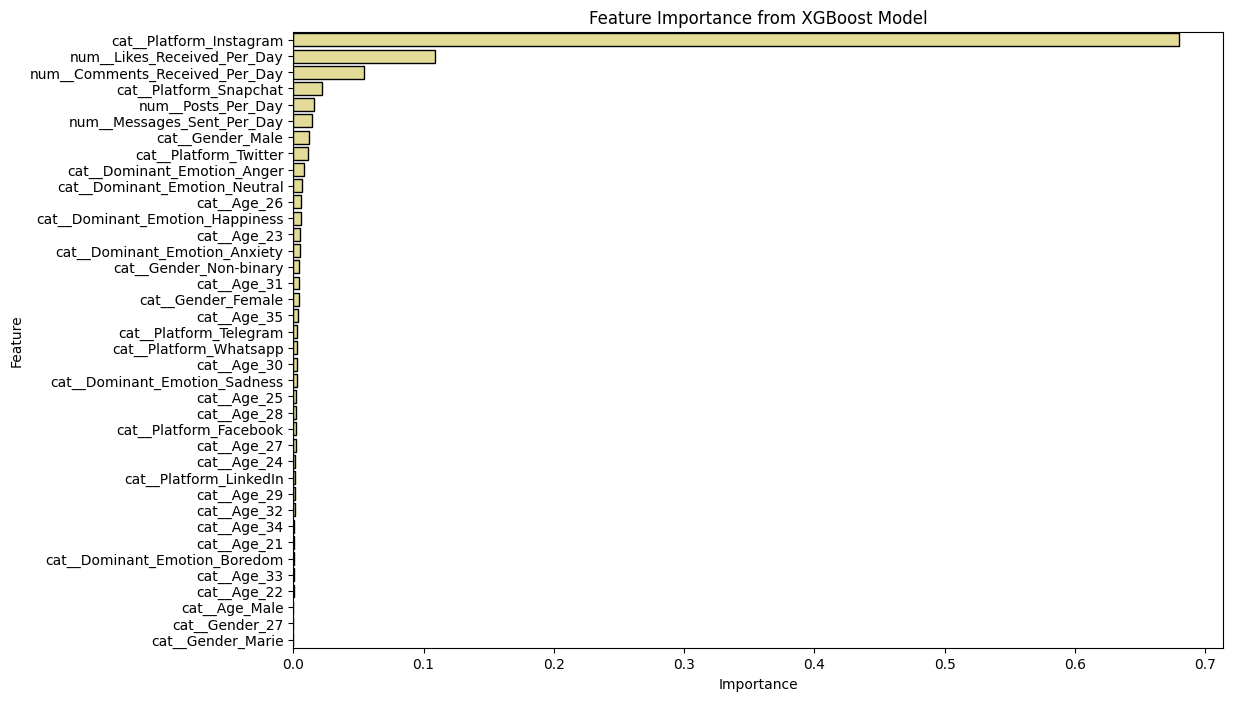

In [65]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, color='khaki', edgecolor='black')
plt.title('Feature Importance from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [66]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the best SVR model
# Convert X_test to a dense array as permutation_importance expects array-like input
perm_importance_svr = permutation_importance(best_svr_model, X_test.toarray(), y_test, random_state=42)

# Get the feature importances and sort them
sorted_idx = perm_importance_svr.importances_mean.argsort()

# Get the names of the features after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()

feature_importance_svr_df = pd.DataFrame({
    'feature': processed_feature_names[sorted_idx],
    'importance': perm_importance_svr.importances_mean[sorted_idx]
})

In [67]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the best SVR model
# Convert X_test to a dense array as permutation_importance expects array-like input
perm_importance_svr = permutation_importance(best_svr_model, X_test.toarray(), y_test, random_state=42);

# Get the feature importances and sort them
sorted_idx = perm_importance_svr.importances_mean.argsort()

# Get the names of the features after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()

feature_importance_svr_df = pd.DataFrame({
    'feature': processed_feature_names[sorted_idx],
    'importance': perm_importance_svr.importances_mean[sorted_idx]
})

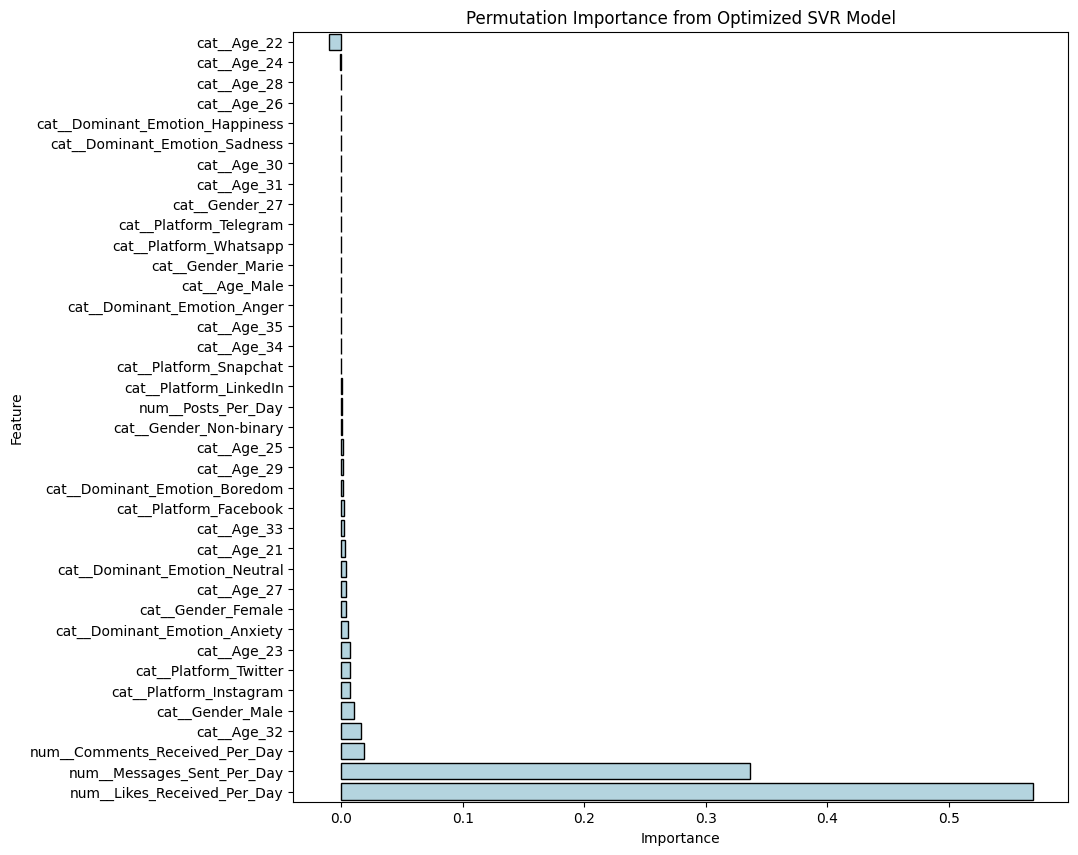

In [68]:
plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_svr_df, color='lightblue', edgecolor='black')
plt.title('Permutation Importance from Optimized SVR Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [69]:
from sklearn.preprocessing import LabelEncoder

# 1. Define Features (X) and Target (y)
# Dropping User_ID as it's an identifier, not a predictor
X = data.drop(columns=['User_ID', 'Dominant_Emotion'])
y = data['Dominant_Emotion']

# 2. Encode Categorical Data
# Convert 'Age' to numeric if it was read as object/category
X['Age'] = pd.to_numeric(X['Age'], errors='coerce')

# One-Hot Encoding for categorical features (Gender, Platform)
X = pd.get_dummies(X, columns=['Gender', 'Platform'], drop_first=True)

# Label Encoding for the Target Variable
le = LabelEncoder()
y = le.fit_transform(y)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (99, 16)
Target shape: (99,)


# **Split Data into 80/20**

In [70]:
#Step 7: Split the Data


from sklearn.model_selection import train_test_split

# Split data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (79, 16)
Testing set size: (20, 16)


In [71]:
#Step 8: Scaling (Normalization / Standardization)

from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = StandardScaler()

# Fit on training set only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling (optional but helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [72]:
#Step 9: Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Handle potential NaNs in the scaled data before feature selection
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Select top 10 features (or fewer depending on your data columns)
# Using ANOVA F-value since inputs are numerical and target is categorical
selector = SelectKBest(score_func=f_classif, k='all') # Set k=5 or 'all'
X_train_selected = selector.fit_transform(X_train_scaled_imputed, y_train)
X_test_selected = selector.transform(X_test_scaled_imputed)

# Get selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Female', 'Gender_Male', 'Gender_Marie', 'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# **Trained the Model**

In [73]:
#Step 10, 11, 12: Model Build, Train, and Test

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Dictionary to store predictions
predictions = {}

for name, model in models.items():
    # Step 10 & 11: Build and Train
    model.fit(X_train_selected, y_train)

    # Step 12: Model Test
    y_pred = model.predict(X_test_selected)
    predictions[name] = y_pred
    print(f"{name} trained and tested.")

Logistic Regression trained and tested.
Random Forest trained and tested.
Support Vector Machine trained and tested.


# **Test the Model**

In [74]:
#Step 13: Model Evaluate

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

results = {}

for name, y_pred in predictions.items():
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_, labels=le.transform(le.classes_)))

    # Optional: Plot Confusion Matrix
    # cm = confusion_matrix(y_test, y_pred)
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title(f'Confusion Matrix: {name}')
    # plt.show()
    print("\n")

--- Logistic Regression ---
Accuracy: 0.5500
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00         0
     Anxiety       0.33      0.50      0.40         2
     Boredom       1.00      0.75      0.86         4
   Happiness       0.50      0.50      0.50         4
     Neutral       0.50      0.71      0.59         7
     Sadness       0.00      0.00      0.00         3

    accuracy                           0.55        20
   macro avg       0.39      0.41      0.39        20
weighted avg       0.51      0.55      0.52        20



--- Random Forest ---
Accuracy: 0.7000
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00         0
     Anxiety       0.50      0.50      0.50         2
     Boredom       0.75      0.75      0.75         4
   Happiness       0.60      0.75      0.67         4
     Neutral       1.00      0.86      0.92         7
     Sadness       1.00      0.33      0.50   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

# **Comparison**

🏆 Best Model: Random Forest with Accuracy: 0.7000

Feature Importance:
                       Feature  Importance
3       Likes_Received_Per_Day    0.169139
0                          Age    0.157219
1   Daily_Usage_Time (minutes)    0.151554
4    Comments_Received_Per_Day    0.132073
5        Messages_Sent_Per_Day    0.116124
2                Posts_Per_Day    0.070652
14            Platform_Twitter    0.027651
6                Gender_Female    0.025693
7                  Gender_Male    0.025503
15           Platform_Whatsapp    0.023784
13           Platform_Telegram    0.023485
9            Gender_Non-binary    0.021659
12           Platform_Snapchat    0.021322
10          Platform_Instagram    0.017922
11           Platform_LinkedIn    0.016220
8                 Gender_Marie    0.000000


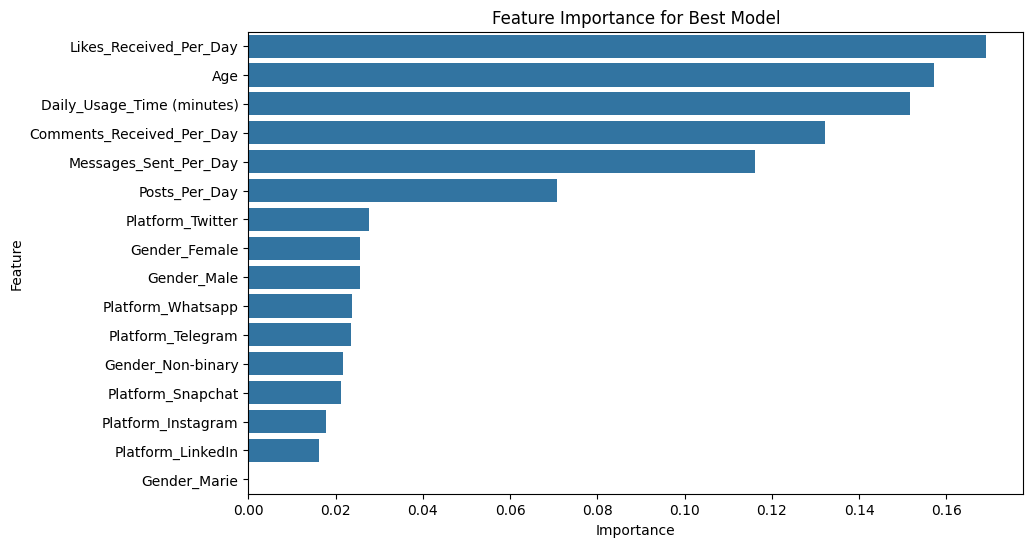

In [75]:
#Step 14: Compare and Choose the Best Model

# 1. Compare models
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"🏆 Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

# 2. Feature Importance (if applicable, e.g., Random Forest)
if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance_df)

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance for Best Model')
    plt.show()
else:
    print(f"Feature importance plot not available for {best_model_name} (only available for tree-based models).")

In [76]:
#Step 15: Save the Best Model

import joblib

# Save the model
filename = 'best_model.pkl'
joblib.dump(best_model, filename)

# Also save the scaler and label encoder for preprocessing new data later
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

print(f"Model saved as {filename}")

Model saved as best_model.pkl
